In [229]:
%matplotlib inline

# This will reload all modules before executing a new line
# This is important, if we change our modules, we don't have to restart the kernel
%load_ext autoreload
%autoreload 2

from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import loading_data as ld

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. LOADING DATA

Loading CSV Files:

In [251]:
df_train = ld.load_train_values()
df_label = ld.load_train_labels()
df_test = ld.load_test_values()

print(df_train.shape)
print(df_label.shape)
print(df_test.shape)

(260601, 39)
(260601, 2)
(86868, 39)


Merging train values and train labels:

In [252]:
train_data_full = pd.merge(df_train, df_label, on='building_id')

## 2. EXPLANATORY DATA ANALYSIS (EDA)

### 2.1. DATA DESCRIPTION

Min, Max and Mean Values - Detect any possible outlier

In [253]:
train_data_full.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


Checking how many unique values there are for each variable and Checking if there is any missing value

In [254]:
import summarizer as sum
sum.summarize_dataframe(train_data_full)

,Data type,Unique values,Missing value
building_id,int64,260601,0
geo_level_1_id,int64,31,0
geo_level_2_id,int64,1414,0
geo_level_3_id,int64,11595,0
count_floors_pre_eq,int64,9,0
age,int64,42,0
area_percentage,int64,84,0
height_percentage,int64,27,0
land_surface_condition,object,3,0
foundation_type,object,5,0


Initial analysis of how to handle location

In [255]:
# Calculate the unique counts for both train and test data, then print difference between them
unique_counts = pd.DataFrame({
    'Location Level': ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id'],
    'Unique Counts (Train)': [df_train['geo_level_1_id'].nunique(), df_train['geo_level_2_id'].nunique(), df_train['geo_level_3_id'].nunique()],
    'Unique Counts (Test)': [df_test['geo_level_1_id'].nunique(), df_test['geo_level_2_id'].nunique(), df_test['geo_level_3_id'].nunique()]
})

unique_counts['Difference'] = unique_counts['Unique Counts (Train)'] - unique_counts['Unique Counts (Test)']
print(unique_counts)

   Location Level  Unique Counts (Train)  Unique Counts (Test)  Difference
0  geo_level_1_id                     31                    31           0
1  geo_level_2_id                   1414                  1364          50
2  geo_level_3_id                  11595                 10213        1382


### 2.2. DATA VISUALIZATION

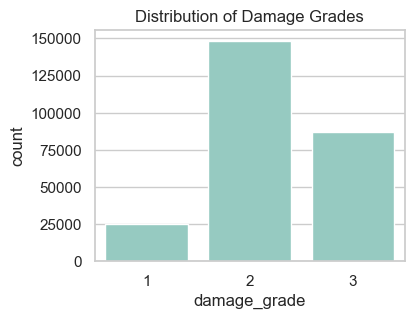

In [256]:
plt.figure(figsize=(4, 3))  
sns.countplot(data=train_data_full, x='damage_grade')
plt.title('Distribution of Damage Grades')
plt.show()

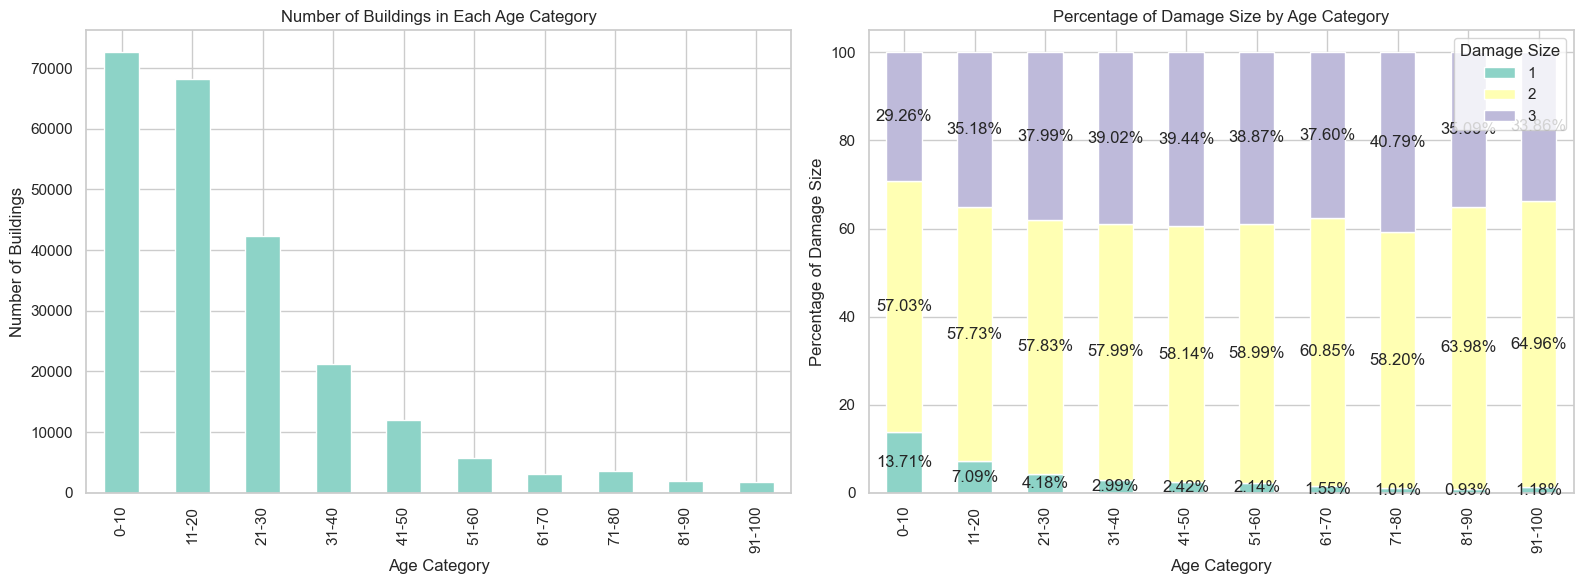

In [257]:
from visualizations import visualize_age_and_damage
visualize_age_and_damage(train_data_full)

## 3. DATA PREPROCESSING

### 3.1. Balance? Scale?

### 3.2. MEAN ENCODING FOR LOCATION VALUES

In [263]:
from geo_level_id_encoder import encode_geolocation

train_data_full_encoded, _, mean_damage_maps = encode_geolocation(train_data_full, None, columns_to_encode=['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id'])

TypeError: 'NoneType' object is not subscriptable

In [262]:
df_train_geo_encoded.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,geo_level_1_id_mean_damage,geo_level_2_id_mean_damage,geo_level_3_id_mean_damage
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,2.161724,2.740741,2.837838
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,2.485273,2.487437,2.062500
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,2.563369,2.518750,2.580882
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,2.000960,2.107317,2.096774
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,2.337713,2.348748,2.368852


### 3.3. ONE-HOT-ENCODING FOR COLUMNS WITH "OBJECTs"

In [247]:
import feature_engineering as fe
df_train_engineered = fe.engineer_features(df_train_geo_encoded)

Dropping 3 columns from the dataframe.
List of columns to drop:
0:	position
1:	plan_configuration
2:	legal_ownership_status

One-hot encoding 5 columns.
List of columns to one-hot encode:
0:	land_surface_condition
1:	foundation_type
2:	roof_type
3:	ground_floor_type
4:	other_floor_type



### 3.4. DATA CLEANING - DROPPING UNNECESSARY COLUMNS

In [248]:
# Specify the list of columns to be dropped
dropping_geo_levels = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']

# Drop the specified columns from the DataFrame
df_train_engineered = df_train_engineered.drop(columns=dropping_geo_levels)

In [249]:
df_train_engineered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 51 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   building_id                             260601 non-null  int64  
 1   count_floors_pre_eq                     260601 non-null  int64  
 2   age                                     260601 non-null  int64  
 3   area_percentage                         260601 non-null  int64  
 4   height_percentage                       260601 non-null  int64  
 5   has_superstructure_adobe_mud            260601 non-null  int64  
 6   has_superstructure_mud_mortar_stone     260601 non-null  int64  
 7   has_superstructure_stone_flag           260601 non-null  int64  
 8   has_superstructure_cement_mortar_stone  260601 non-null  int64  
 9   has_superstructure_mud_mortar_brick     260601 non-null  int64  
 10  has_superstructure_cement_mortar_brick  2606

## 4. FEATURE ENGINEERING

## 5. MODEL BUILDING AND EVALUATION

### 5.1. MODEL IMPLEMENTATION

In [250]:
import models as md

X_train, X_test, y_train, y_test, rf_model = md.make_and_return_model(df_train_engineered, df_label_balanced)

KeyboardInterrupt: 

### 5.2. MODEL EVALUATION

In [174]:
# Predictions
preds = rf_model.predict(X_test)

# We want to evaluate our model with micro average f1 score
from sklearn.metrics import f1_score
f1_score(y_test, preds, average='micro')

1.0

## 6. PREDICTIONS OUTPUT